In [1]:
import pandas as pd
import numpy as np

# Calculando o sentimento mensal

In [4]:
df = pd.read_csv('all_features.csv')

In [2]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [5]:
df.head(1)

,datetime,tweet_id,processed_text,text_lower,textblob_sentiment,vader_sentiment,afinn_sentiment,textblob_score,vader_score,afinn_score,afinn_score_norm,strength,has_link,has_spam,user_presence,presence_min
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨ join thil sunday celebrat 6 month sinc genes...,✨join me this sunday to celebrate 6 months sin...,Positive,Positive,Positive,0.44,0.89,3.00,0.49,weak,has_link,has_spam,mais de 1 Até 5,1-10


# Seleção de Atributos

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import numpy as np

In [88]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [94]:
X = np.array(df[['has_link','has_spam','user_presence','presence_min']])
y = np.array(df['textblob_sentiment'])
names = np.array(['has_link','has_spam','user_presence','presence_min'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [95]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Feature 0 has_link: 5064.878135
Feature 1 has_spam: 11145.841960
Feature 2 user_presence: 1157.687797
Feature 3 presence_min: 3801.993232


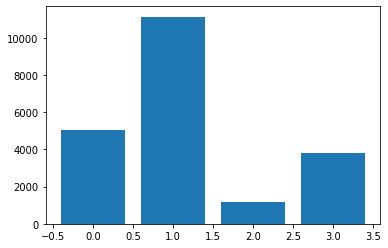

In [91]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d %s: %f' % (i, names[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [7]:
import dataframe_image as dfi

In [10]:
df[['text_lower','presence_min']].head(20)

,text_lower,presence_min
0,✨join me this sunday to celebrate 6 months sin...,1-10
1,@top7ico @mxcfoundation @defineplatform @yopfi...,10-100
2,@metaspatial_io good project go to the moon 🚀🚀...,1-10
3,@metaverse_yin i just take the hype as alpha lol,10-100
4,@metaverse_yin keep it coming ! lmao,10-100
5,‘metaverse’ girl group aespa’s 1st mini album ...,1-10
6,@metaspatial_io #spat #metaspatial #metaverse ...,1-10
7,discover items you love in the metaverse\n\nbu...,1-10
8,@neopets no.\ni would be excited if you cancel...,1-10
9,@metaspatial_io great project \n@diemlibreio @...,1-10


In [12]:
presence = df[['text_lower','presence_min']].head(20)

In [14]:
df['presence_min'].value_counts()

1-10                 1972200
10-100               1116331
equal or over 100     579244
Name: presence_min, dtype: int64

In [ ]:
dfi.export(
    presence,
    "user_presence.png",
    table_conversion="matplotlib"
)

In [87]:
df.value_counts('presence_min')

presence_min
1-10                 1972200
10-100               1116331
equal or over 100     579244
dtype: int64

In [80]:
def mergePresence(value):
    if value == '1 ou menos':
        return '1-10'
    if value == 'mais de 1 Até 5':
        return '1-10'
    if value == 'entre 5 e 10':
        return '1-10'
    if value == 'entre 10 e 50':
        return '10-100'
    if value == 'entre 50 e 100':
        return '10-100'
    if value == 'entre 100 e 1000':
        return 'equal or over 100'
    if value == 'entre 1000 e 10000':
        return 'equal or over 100'
    if value == 'mais de 10000':
        return 'equal or over 100'

In [5]:
df[df['has_spam'] == 'has_spam']['text_lower'][3667774]

'@beastybrudda @cryptobeaker agree, they have done nothing but deliver. there would be no metaverse without bayc is a big stretch imo'

In [81]:
df['presence_min'] = df.apply(lambda row: mergePresence(row['user_presence']), axis=1)

# Geral

#### Quantidade de tweets por mês

In [6]:
month_key = pd.Grouper(freq='M')
week_key = pd.Grouper(freq='W')
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
df.set_index('datetime').groupby([month_key])[['tweet_id']].count()

,tweet_id
datetime,
2021-10-31 00:00:00+00:00,307147
2021-11-30 00:00:00+00:00,670338
2021-12-31 00:00:00+00:00,584046
2022-01-31 00:00:00+00:00,629976
2022-02-28 00:00:00+00:00,504047
2022-03-31 00:00:00+00:00,471117
2022-04-30 00:00:00+00:00,501104


In [7]:
df.set_index('datetime').groupby([month_key])[['afinn_score_norm']].sum()

,afinn_score_norm
datetime,
2021-10-31 00:00:00+00:00,"53,601.36"
2021-11-30 00:00:00+00:00,"139,548.30"
2021-12-31 00:00:00+00:00,"104,442.22"
2022-01-31 00:00:00+00:00,"93,200.01"
2022-02-28 00:00:00+00:00,"70,650.92"
2022-03-31 00:00:00+00:00,"75,953.30"
2022-04-30 00:00:00+00:00,"87,683.30"


# Positivos

In [43]:
positive = df[df['afinn_sentiment'] == 'Positive']
positive.set_index('datetime').groupby([month_key])[['afinn_score_norm']].sum()

,afinn_score_norm
datetime,
2021-10-31 00:00:00+00:00,"67,849.84"
2021-11-30 00:00:00+00:00,"163,140.91"
2021-12-31 00:00:00+00:00,"127,245.88"
2022-01-31 00:00:00+00:00,"121,712.27"
2022-02-28 00:00:00+00:00,"95,323.43"
2022-03-31 00:00:00+00:00,"94,732.98"
2022-04-30 00:00:00+00:00,"105,467.20"


In [44]:
positive.set_index('datetime').groupby([month_key])[['tweet_id']].count()

,tweet_id
datetime,
2021-10-31 00:00:00+00:00,136098
2021-11-30 00:00:00+00:00,323106
2021-12-31 00:00:00+00:00,257998
2022-01-31 00:00:00+00:00,257306
2022-02-28 00:00:00+00:00,200357
2022-03-31 00:00:00+00:00,197510
2022-04-30 00:00:00+00:00,221623


In [ ]:
136098
323106
257998
257306
200357
197510
221623

# Positivos & Fortes

In [9]:
positive_strong = df[(df['strength'] == 'strong')]

In [32]:
positive_strong = positive_strong[positive_strong['textblob_sentiment'] == 'Positive']
positive_strong.set_index('datetime').groupby([month_key])[['textblob_score']].sum()

,textblob_score
datetime,
2021-10-31 00:00:00+00:00,"2,403.35"
2021-11-30 00:00:00+00:00,"4,671.39"
2021-12-31 00:00:00+00:00,"3,892.18"
2022-01-31 00:00:00+00:00,"4,168.89"
2022-02-28 00:00:00+00:00,"3,345.41"
2022-03-31 00:00:00+00:00,"2,909.41"
2022-04-30 00:00:00+00:00,"2,571.01"


In [10]:
positive_strong.set_index('datetime').groupby([month_key])[['tweet_id']].count()

,tweet_id
datetime,


# Positivos & Fortes & Really Não-Spam

In [6]:
month_key = pd.Grouper(freq='M')
week_key = pd.Grouper(freq='W')
positive_strong_nospam = df[(df['strength'] == 'strong') & (df['has_link'] == 'no_link') & (df['has_spam'] == 'no_spam') & (df['user_presence'] == '1 ou menos')]
positive_strong_nospam = positive_strong_nospam[positive_strong_nospam['textblob_sentiment'] == 'Positive']
positive_strong_nospam.set_index('datetime').groupby([month_key])[['textblob_score']].sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [108]:
positive_strong_nospam.set_index('datetime').groupby([month_key])[['tweet_id']].count()

,tweet_id
datetime,
2021-10-31 00:00:00+00:00,1103
2021-11-30 00:00:00+00:00,1669
2021-12-31 00:00:00+00:00,1502
2022-01-31 00:00:00+00:00,1964
2022-02-28 00:00:00+00:00,1286
2022-03-31 00:00:00+00:00,755
2022-04-30 00:00:00+00:00,653


In [ ]:
313,72
501,60
469,26
562,64
381,68
240,19
213,82

# Negativos & Fortes & Não Spam

In [77]:
month_key = pd.Grouper(freq='M')
week_key = pd.Grouper(freq='W')
negative_strong_spam = df[(df['strength'] == 'strong') & (df['has_link'] == 'no_link') & (df['has_spam'] == 'no_spam')]
negative_strong_spam = negative_strong_spam[negative_strong_spam['textblob_sentiment'] == 'Negative']
negative_strong_spam.set_index('datetime').groupby([month_key])[['textblob_score']].sum()

,textblob_score
datetime,
2021-10-31 00:00:00+00:00,-495.35
2021-11-30 00:00:00+00:00,-630.78
2021-12-31 00:00:00+00:00,-574.02
2022-01-31 00:00:00+00:00,-884.42
2022-02-28 00:00:00+00:00,-577.52
2022-03-31 00:00:00+00:00,-296.18
2022-04-30 00:00:00+00:00,-232.65


In [78]:
negative_strong_spam.set_index('datetime').groupby([month_key])[['tweet_id']].count()

,tweet_id
datetime,
2021-10-31 00:00:00+00:00,1711
2021-11-30 00:00:00+00:00,2223
2021-12-31 00:00:00+00:00,2020
2022-01-31 00:00:00+00:00,2836
2022-02-28 00:00:00+00:00,1941
2022-03-31 00:00:00+00:00,979
2022-04-30 00:00:00+00:00,839


# Negativos & Fracos & Spam

In [114]:
month_key = pd.Grouper(freq='M')
week_key = pd.Grouper(freq='W')
negative_weak_spam = df[(df['strength'] == 'weak') & (df['has_link'] == 'has_link') & (df['has_spam'] == 'has_spam')]
negative_weak_spam = negative_weak_spam[negative_weak_spam['afinn_sentiment'] == 'Negative']
negative_weak_spam.set_index('datetime').groupby([month_key])[['afinn_score_norm']].sum()

,afinn_score_norm
datetime,
2021-10-31 00:00:00+00:00,"-1,937.85"
2021-11-30 00:00:00+00:00,"-4,539.52"
2021-12-31 00:00:00+00:00,"-5,281.71"
2022-01-31 00:00:00+00:00,"-6,592.50"
2022-02-28 00:00:00+00:00,"-6,217.81"
2022-03-31 00:00:00+00:00,"-6,202.19"
2022-04-30 00:00:00+00:00,"-6,938.73"


In [115]:
negative_weak_spam.set_index('datetime').groupby([month_key])[['tweet_id']].count()

,tweet_id
datetime,
2021-10-31 00:00:00+00:00,4668
2021-11-30 00:00:00+00:00,11034
2021-12-31 00:00:00+00:00,12810
2022-01-31 00:00:00+00:00,15913
2022-02-28 00:00:00+00:00,15029
2022-03-31 00:00:00+00:00,15129
2022-04-30 00:00:00+00:00,17042


In [ ]:
-1937,85
-4539,52
-5281,71
-6592,50
-6217,81
-6202,19
-6938,73